In [ ]:
import numpy as np
from tensorflow import keras
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
file = 'tt.txt'



In [ ]:
rosa = pd.read_csv(file)
rosa

,Eighteen years eighteen years
0,She got one of your kids got you for eighteen ...
1,I know somebody paying child support for one o...
2,His baby mama car and crib is bigger than his
3,You will see him on TV any given Sunday
4,Win the Super Bowl and drive off in a Hyundai
...,...
6185,Lets jet out the club get some oxygen
6186,Your friends claim Im a player you be lucky to...
6187,But you know people gon be talking bout us weekly
6188,My car be in a Robb Report but whats more impo...


In [ ]:
with open(file, encoding='utf-8') as f:
    Corpus = f.readlines()  
Corpus = ' '.join(Corpus).lower().split('\n')

Corpus

['eighteen years eighteen years',
 ' she got one of your kids got you for eighteen years',
 ' i know somebody paying child support for one of his kids',
 ' his baby mama car and crib is bigger than his',
 ' you will see him on tv any given sunday',
 ' win the super bowl and drive off in a hyundai',
 ' she was supposed to buy your shorty tyco with your money',
 ' she went to the doctor got lipo with your money',
 ' she walking around looking like michael with your money',
 ' shouldve got that insured geico for your money',
 ' if you aint no punk',
 ' holla we want prenup we want prenup yeah',
 ' its something that you need to have',
 ' cause when she leave your ass she gon leave with half',
 ' eighteen years eighteen years',
 ' and on the the birthday he found out it wasnt his',
 ' now i aint saying you a gold digger you got needs',
 ' you dont want a dude to smoke but he cant buy weed',
 ' you go out to eat and he cant pay yall cant leave',
 ' theres dishes in the back he gotta roll up

In [ ]:
print('Corpus Length:', len(Corpus))

Corpus Length: 6192


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Corpus)
totalWords = len(tokenizer.word_index) + 1
print(totalWords)

6141


In [ ]:
sequences = []
for line in Corpus:
    tokenList = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokenList)):
        ngramSequence = tokenList[:i+1]
        sequences.append(ngramSequence)

In [ ]:
sequences[:5]

[[928, 240], [928, 240, 928], [928, 240, 928, 240], [22, 23], [22, 23, 76]]

In [ ]:
def padSequences(sequences):
    maxSequenceLen = max([len(seq) for seq in sequences])
    sequences = np.array(pad_sequences(sequences, maxlen=maxSequenceLen, padding='pre'))
    
    predictors, label = sequences[:,:-1], sequences[:,-1]
    label = to_categorical(label, num_classes=totalWords)
    return predictors, label, maxSequenceLen

predictors, label, maxSequenceLen = padSequences(sequences)

In [ ]:
model = keras.models.load_model('model2textgen.h5')

In [ ]:
model = models.Sequential()
model.add(layers.Embedding(totalWords, 64, input_length=maxSequenceLen - 1))
model.add(layers.LSTM(128))
model.add(layers.Dense(totalWords, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 316, 64)           177536    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 2774)              357846    
Total params: 634,198
Trainable params: 634,198
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history = model.fit(predictors, label, epochs=100, 
                    callbacks=[EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)])

Epoch 1/100
1393/1393 [==============================] - 49s 19ms/step - loss: 5.8681 - accuracy: 0.0749
Epoch 2/100
1393/1393 [==============================] - 27s 19ms/step - loss: 4.8777 - accuracy: 0.1483
Epoch 3/100
1393/1393 [==============================] - 27s 19ms/step - loss: 4.2965 - accuracy: 0.2125
Epoch 4/100
1393/1393 [==============================] - 27s 19ms/step - loss: 3.8499 - accuracy: 0.2545
Epoch 5/100
1393/1393 [==============================] - 27s 19ms/step - loss: 3.4948 - accuracy: 0.2969
Epoch 6/100
1393/1393 [==============================] - 26s 19ms/step - loss: 3.1764 - accuracy: 0.3376
Epoch 7/100
1393/1393 [==============================] - 26s 19ms/step - loss: 2.8759 - accuracy: 0.3789
Epoch 8/100
1393/1393 [==============================] - 26s 19ms/step - loss: 2.6377 - accuracy: 0.4250
Epoch 9/100
1393/1393 [==============================] - 26s 19ms/step - loss: 2.4024 - accuracy: 0.4709
Epoch 10/100
1393/1393 [==============================]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0.98, 'Loss/Accuracy of the Language Model')

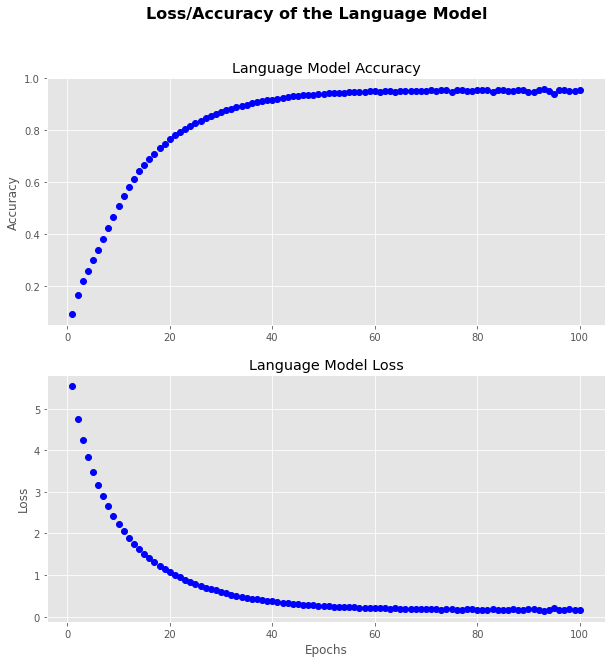

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Accuracy')
plot = ax2.plot(epochs, loss, 'bo', label='Loss')
ax1.set(title='Language Model Accuracy', ylabel='Accuracy')
ax2.set(title='Language Model Loss', xlabel='Epochs', ylabel='Loss')

fig.suptitle('Loss/Accuracy of the Language Model', fontsize=16, fontweight = 'bold')

In [ ]:
def generateText(seed):   #A text seed is provided
    for wordLength in range(45):   #Generates a text with a range of word length
        tokenList = tokenizer.texts_to_sequences([seed])[0]  #Turns the seed into sequences
        tokenList = pad_sequences([tokenList], maxlen=maxSequenceLen - 1, padding='pre')
        predicted = model.predict_classes(tokenList, verbose=0) #Predicts the next sequence(generated
        outputWord = " "                                         #text)  
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                outputWord = word
                break
        seed += " " + outputWord     #Returns the seed plus generated text
    return seed

In [ ]:
generateText('my love')

'my love over for im in look everything everything everything everything everything everything everything everything everything ha bring couches keys fame bring dreams kind bring cousin attitude unless bring cousin attitude unless bring cousin so that dunno what great all want ds rights all want ds rights'

In [ ]:
generateText('Honey')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Honey i just want to let you know that i’ll always be around regardless of the tough situations this love will last forever so please allow me to love you more than i already do baby you because i am sold in a lot when i'

In [ ]:
generateText('Bumble bee')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Bumble bee a doctor would be baffled at how my heart conveniently decides to beat faster or slower – depending on whether i’m thinking about you or not xoxo if these sample love letters for her can give your love or the continue to push all the'

In [ ]:
generateText('mi Love')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'mi Love can never be measured it can only be felt you have painted my life with the colors of heaven i don’t want anything else as long as your love is with me forever now i love you so much honey and i just wanted to'

In [ ]:
generateText('my Heartbeat')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'my Heartbeat you make me feel happy and i have ever known before i met and hard i get this one else can always be my wish it’s let you it’s always there for me i love you darling when i wake up a lot when i'

In [ ]:
generateText('Loofu mi')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'Loofu mi i love you more than i did yesterday but not more than i will tomorrow ❤ on for a thousand will more i love you more than every day could always mean more than the most heartfelt growing in my dreams and i am ready'

In [ ]:
model.save('./rosaLove.h5')
model = keras.models.load_model('./rosaLove.h5')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1847666d-1024-4ccd-aa0a-538596f06c6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>